In [1]:
import random
from scipy import stats
import scipy
from numpy.linalg import inv
import numpy as np
import pandas as pd
from scipy.stats import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Students :  

-  Alexander Svetikov 320569791
-  Yevgeni Sparber 309125326

# Q1 Simulation

In [8]:
def Overall(lamda,n):
    #question 1.1
    def xyvecs(lamda, n):  
        x =  uniform.rvs(loc=-2,scale=4,size=n)
        eps = np.random.normal(0,0.3,n)
        y=np.sin(lamda*x)+(0.3*(x**2))+(((x-0.5)/3)**3)+eps
        return(x,y)
        
    def xyvecsReal(lamda, n):  
        xo =  uniform.rvs(loc=-2,scale=4,size=n)
        yo=np.sin(lamda*xo)+(0.3*(xo**2))+(((xo-0.5)/3)**3)
        return(xo,yo)
    
    #####sample data
    x,y =xyvecs(lamda,n)
    xo,yo =xyvecsReal(lamda,n)
    newx,newy = xyvecs(lamda,n)
    ######
    
    #question 1.2  
    def gaussKernel(x,xo,h):
        fx=(1/(h * np.sqrt(2 * np.pi))*np.exp(-(x - xo)**2 / (2 * h**2))) 
        return fx 
    
    def regKernel(x,y,xo,h):
        gaussKernalSum = []
        predictY = []
        for i in range(len(x)):
            gaussKernalSum.append(gaussKernel(x[i],xo,h))
        for i in range(len(x)):
            predictY.append((y[i]*gaussKernel(x[i],xo,h)))
        predictYy=sum(predictY)/sum(gaussKernalSum) 
        return (predictYy)
    
    #question 1.3.a 
    def err(x,y,h):
        error=[]
        for i in range(len(xo)):
            error.append(((y[i]-regKernel(x,y,x[i],h))**2))
        emerr=(sum(error))/len(xo)
        return(emerr)
    
    #question 1.3.b 
    def trace_W_Ker(x,y,xo,h):
        trace = []
        scale = np.sqrt(1/(2*np.pi))
        for i in range(len(x)):
            expo = np.exp(-((x[i] - x)**2) / (2 * (h**2)))
            denominator = sum(scale*expo)
            ii = scale*np.exp(-((x[i] - x[i])**2) / (2 * (h**2)))
            trace.append(ii/denominator)
        Eop=(2*0.3*sum(trace))/(len(x))
        return(Eop)
    
    #question 1.3.c 
    def ErrIn(x,y,h):
        yo=np.sin(lamda*x)+(0.3*(x**2))+(((x-0.5)/3)**3)
        error=((yo-regKernel(x,y,x,h))**2)
        errorIn=sum(error)/len(y)
        return(errorIn)
    
    #question 1.3.d 
    def crossvalid2(x,y,h): 
        kf = KFold(n_splits=5)
        kf.get_n_splits(x)
        KFold(n_splits=5, random_state=None, shuffle=False)
        yPred = []
        mse = []
        for train_index, test_index in kf.split(x):
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            yPred=regKernel(x_train,y_train,x_test,h)
            mse.append(sum((yPred-y_test)**2)/(len(yPred)))
        return(sum(mse)/5)
        
    #question 1.3.e 
    
    def ErrOut(x,y,h,lamda):
        errorOut=((newy-regKernel(x,y,newx,h))**2)
        errorOut=sum(errorOut)/len(y)
        return(errorOut)
    
    #Quadratic 
    def errPolty(x,y):
        constant=np.ones(len(x))
        xfit = np.array([constant,x,x**2]).T
        beta = np.linalg.inv(xfit.T @ xfit) @ xfit.T @ y 
        ypred=xfit @ beta
        error= ((y-ypred)**2)
        emerr=(sum(error))/len(x)
        return(emerr)

    def Eoppoly(x,y):
        constant=np.ones(len(x))
        xfit = np.array([constant,x,x**2]).T
        Px = xfit @ np.linalg.inv(xfit.T @ xfit) @ xfit.T    
        trace = sum(Px)
        Eop=(((2*0.3)/len(x))*trace)[0]
        return(Eop)
    
    def ErrInpoly(x,y):
      yo=np.sin(lamda*x)+(0.3*(x**2))+(((x-0.5)/3)**3)
      constant=np.ones(len(x))
      xfit = np.array([constant,x,x**2]).T
      beta = np.linalg.inv(xfit.T @ xfit) @ xfit.T @ y 
      ypred= xfit @ beta
      bias=sum((ypred-yo.T)**2)/(len(x))
      errin=bias
      return(errin)
      
    def crossvalidpoly(x,y): 
        kf = KFold(n_splits=5)
        kf.get_n_splits(x)
        KFold(n_splits=5, random_state=None, shuffle=False)
        ypred = []
        mse = []
        constant=np.ones(len(x))
        xfit = np.array([constant,x,x**2]).T
        for train_index, test_index in kf.split(xfit):
            x_train, x_test = xfit[train_index], xfit[test_index]
            y_train, y_test = y[train_index], y[test_index]
            beta = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train
            ypred= x_test @ beta
            mse.append(sum((ypred-y_test)**2)/(len(ypred)))
        return(sum(mse)/5)
    
    def ErrOutpoly(x,y):
        constant=np.ones(len(x))
        xfit = np.array([constant,x,x**2]).T
        beta = np.linalg.inv(xfit.T @ xfit) @ xfit.T @ y
        newxfit = np.array([constant,newx,newx**2]).T
        ypred=newxfit@beta
        errorOut=((newy-ypred)**2)
        errorOut=sum(errorOut)/len(y)
        return(errorOut)

    hValues=np.arange(0.02, 3,0.03)
    differr = []
    diffErrOut = []
    difftrace_W_Ker=[] 
    diffCrossvalid = []
    diffErrIn2= [] 
    for i in hValues:
        differr.append(err(x,y,i))
        diffCrossvalid.append(crossvalid2(x,y,i))
        diffErrOut.append(ErrOut(x,y,i,lamda))
        difftrace_W_Ker.append(trace_W_Ker(x,y,xo,i))
        diffErrIn2.append(ErrIn(x,y,i))
    plt.figure(0,dpi=250)
    plt.scatter(hValues,differr, color='r', label = 'err')
    plt.scatter(hValues,difftrace_W_Ker, color='y', label = 'Eop')
    plt.scatter(hValues,diffErrIn2, color='g', label = 'ErrIn')
    plt.scatter(hValues,diffCrossvalid, color='orange', label = 'CV')
    plt.scatter(hValues,diffErrOut, color='b', label = 'ErrOut')
    plt.axhline(errPolty(x,y),color='r')
    plt.axhline(Eoppoly(x,y),color='y')
    plt.axhline(ErrInpoly(x,y),color='g')
    plt.axhline(crossvalidpoly(x,y),color='orange')
    plt.axhline(ErrOutpoly(x,y),color='b')
    plt.xlabel('h')
    plt.ylabel('Error')
    plt.title("Lamda = {}, n = {}".format(lamda,n))    
    plt.grid()
    plt.ylim([0, 0.85])
    plt.axvline(color='black')
    plt.axhline(color='black')
    plt.tight_layout()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True, shadow=True)

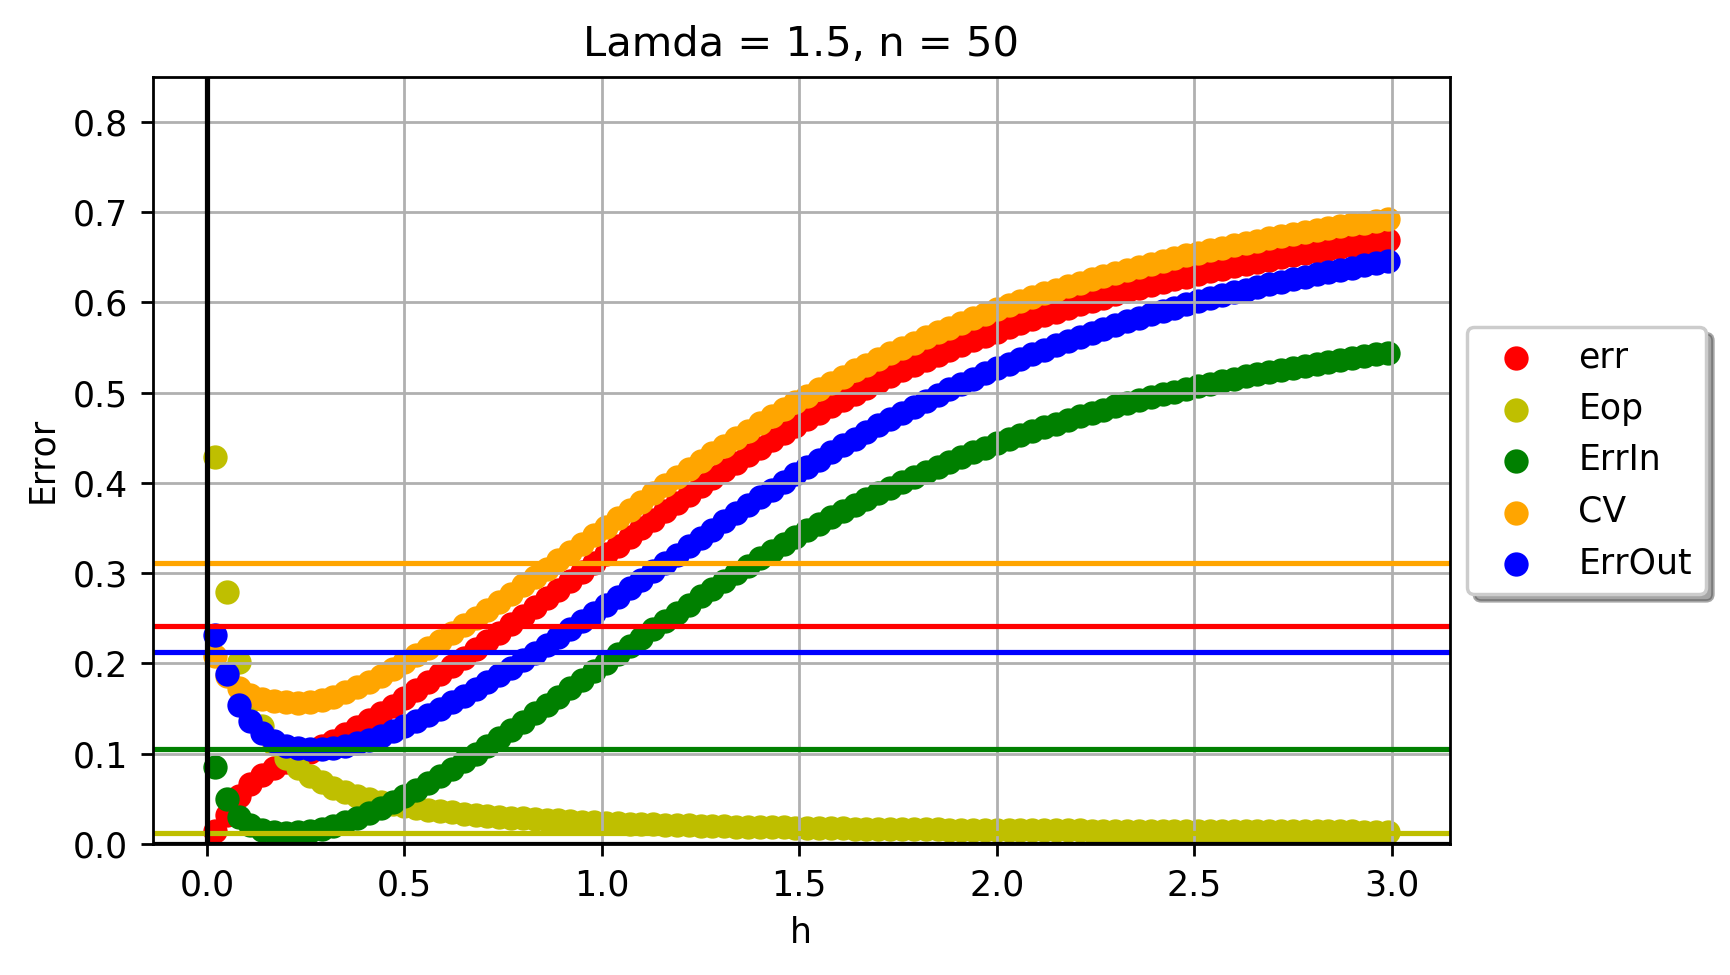

In [9]:
Overall(1.5,50) 

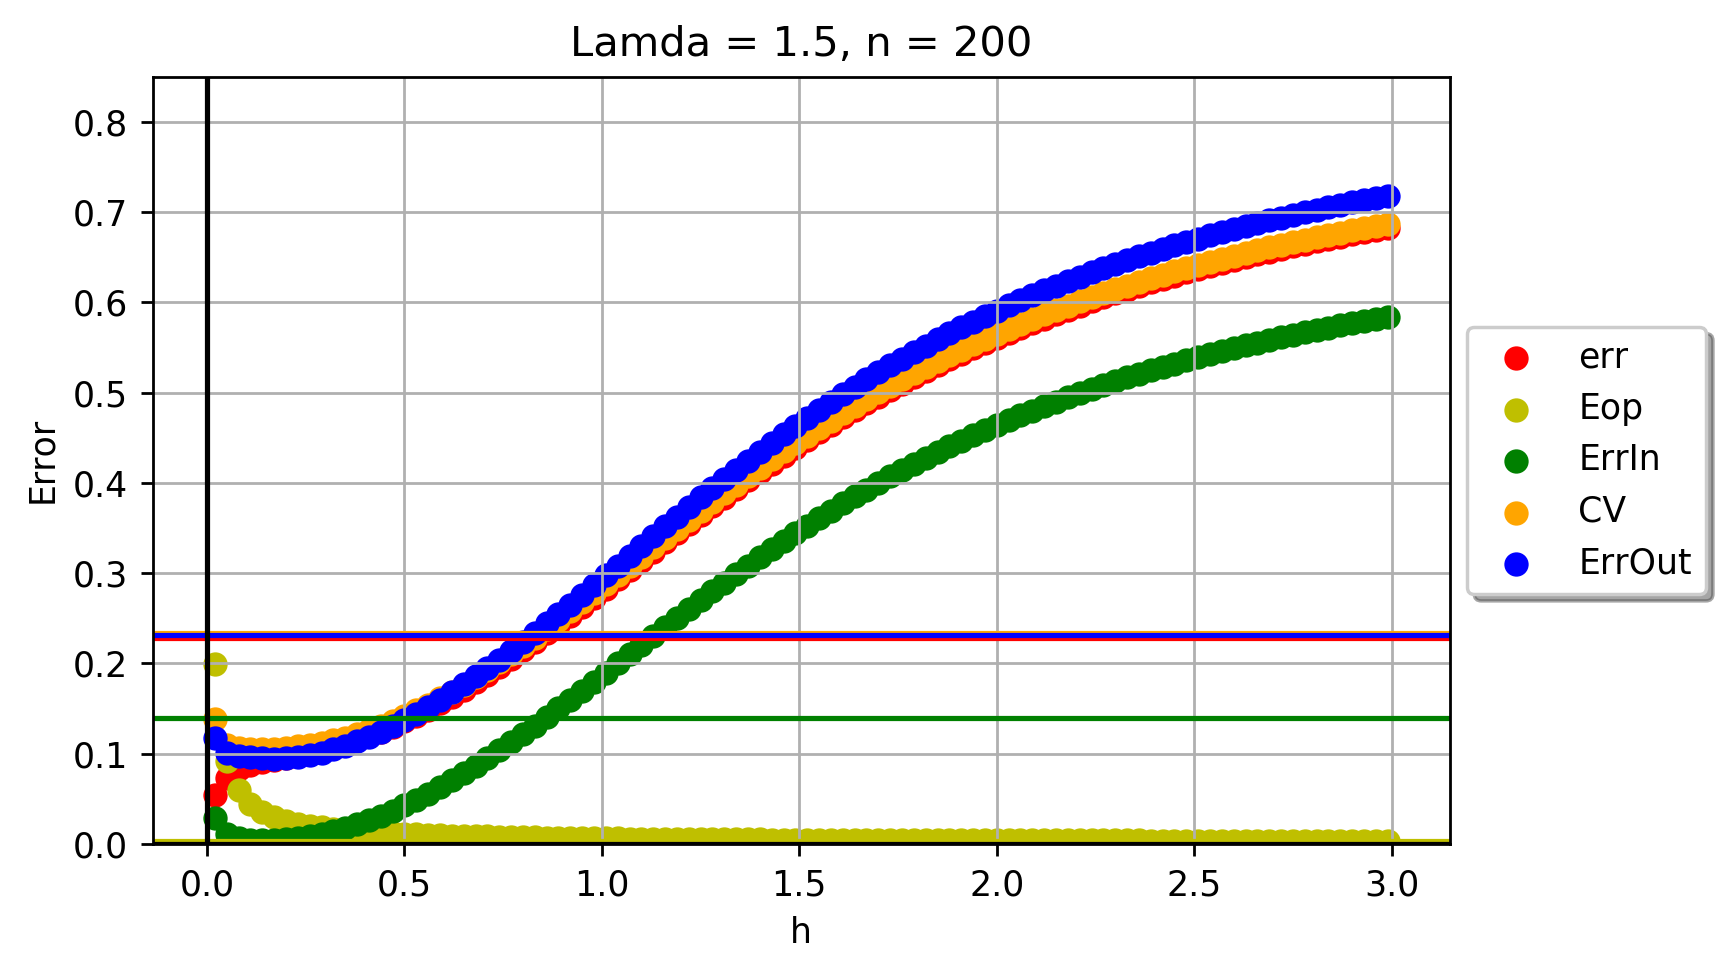

In [10]:
Overall(1.5,200) 

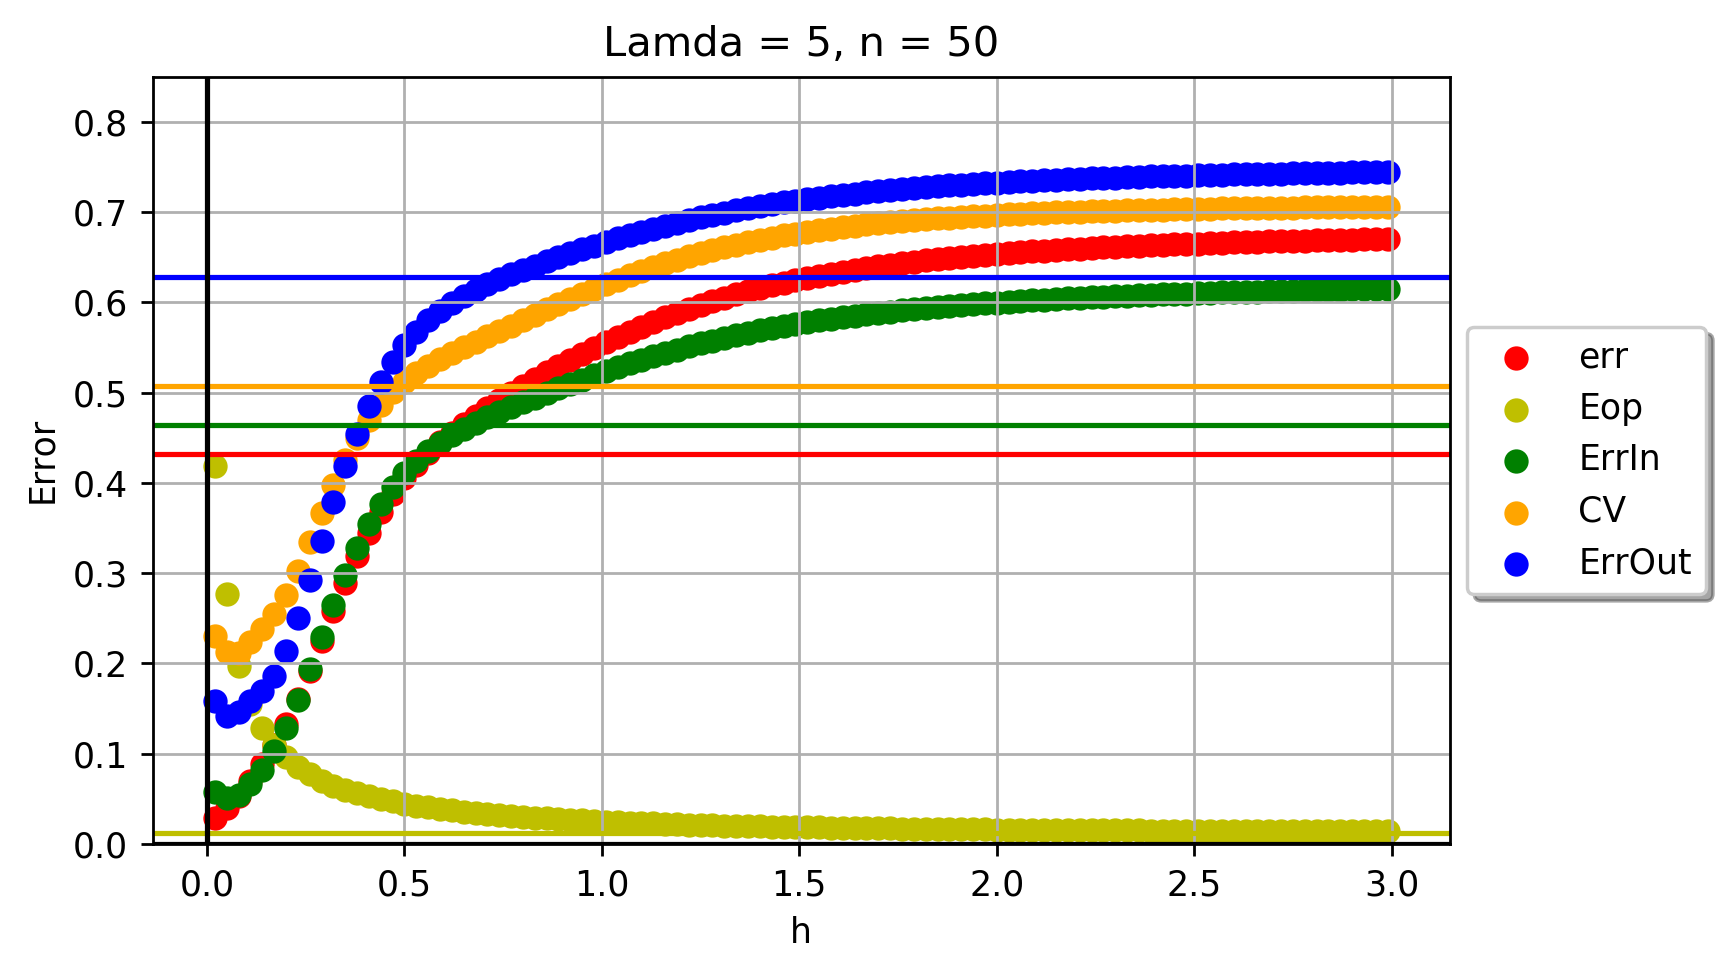

In [11]:
Overall(5,50) 

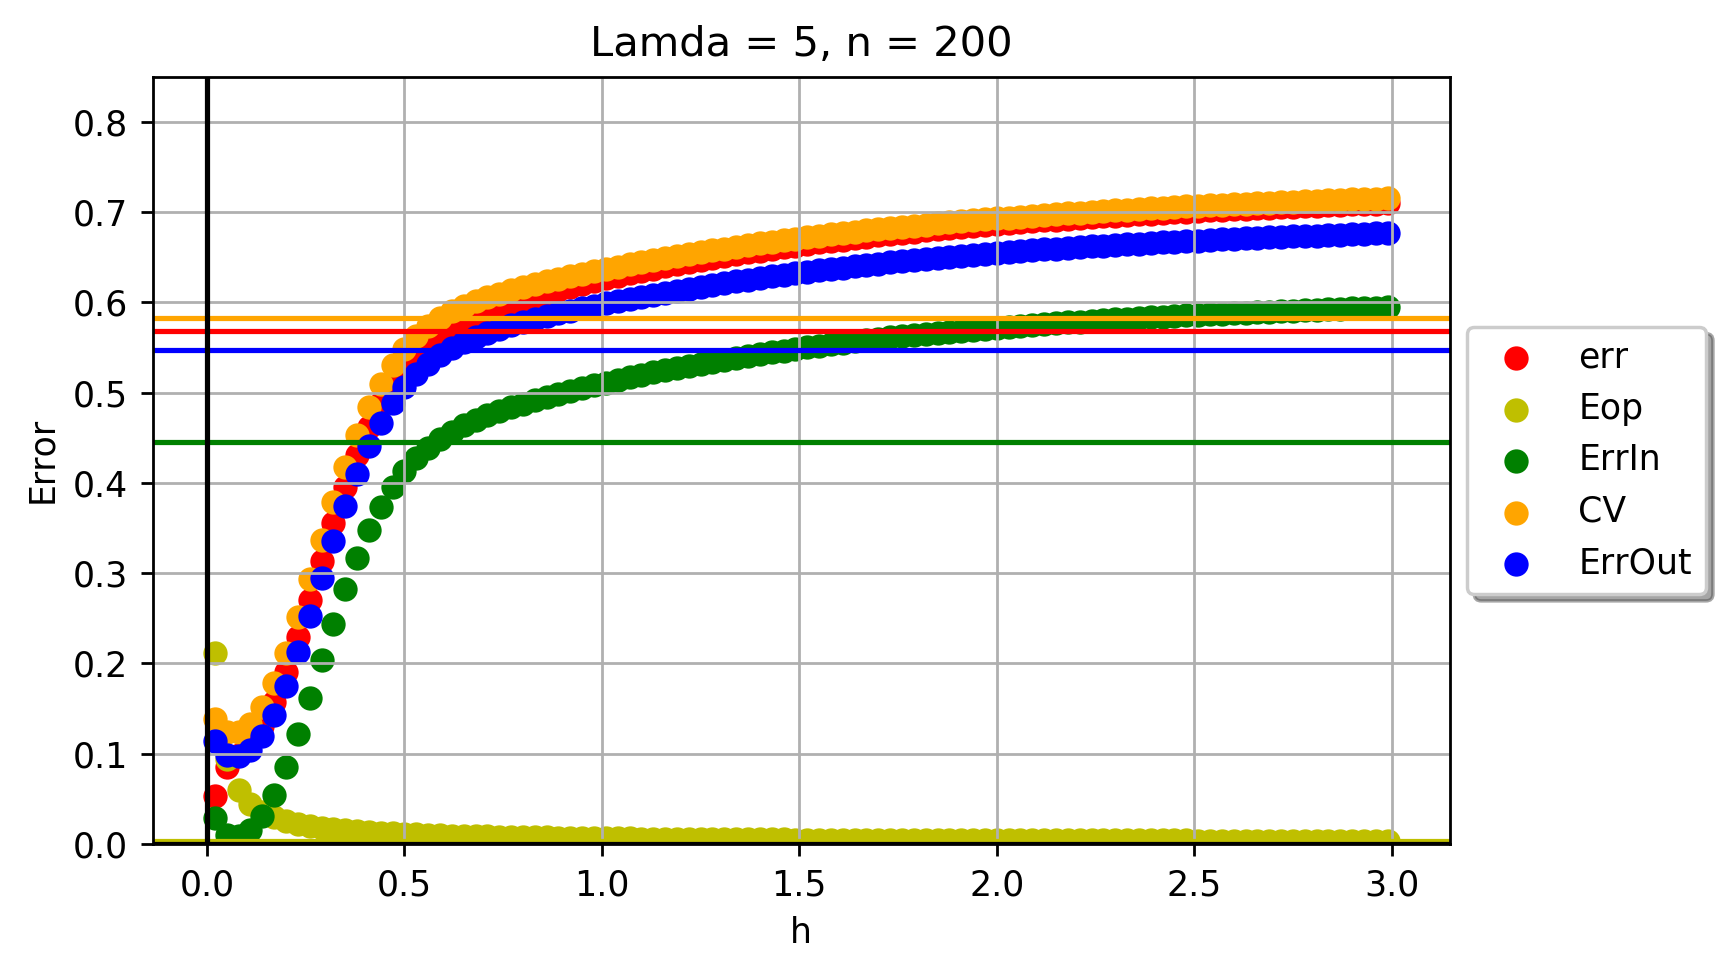

In [12]:
Overall(5,200) 

In this question, we sampled data from the "real" function together with some noise (we used 2 sample sizes and 2 different sinus parameters - fast and slow change rate of the function). For the kernel regression, we examined the errors for the range of h - 0 to 3 with jumps of 0.03 (in the Quadratic regression h constant). From the graphs, we can see that in kernel regression the error decrease when h values are small and then increases sharply until convergence as the h values increase. Because of overfitting, in the range of small h values, we have seen high levels of optimism. When h values high, the kernel becomes wide and covers a bigger part of our data points and thus less "sensitive". When h is big enough the kernel catches all our data points. We can see that the yellow curve representing optimism decreases as h increasing, which happens because of the decrease in the optimism which represents overfitting. It seems that we consistently get lower errors in Errin than with the other metrics in both types of regression. The other metrics behave relatively similar. When the lamda is small, all metrics show lower errors (except for the extreme h values). It's valid for both regressions. This happens because the sinus is changing faster in the larger lamda. It may be more difficult for the regression to follow trends that change faster than those that change slower. Because the kernel regression is more flexible than the quadratic regression, we can see that at the very low h values there are no differences in errors between the two lamda values, however as h increases the flexibility is lost and there is no advantage for the kernel regression. The most noticeable difference between the small sample and the larger one is the level of optimism. In the small sample, the optimism is higher, it makes sense, since the larger the sample, the closer we are to the "real" data. Another interesting thing that emerges from the simulation is that the kernel regression optimism decreases and converges to the quadratic regression constant optimism. The reason for the over-optimism of the kernel regression, as we have stated already - "over-flexibility". The kernel provides better predictions when the h values are lower but it pays with over-fitting, while in quadratic regression the predictions are less good but less overfitted. In the high h values (around h=1 and above), the quadratic regression provides more accurate predictions than the kernel.



# Q 2 

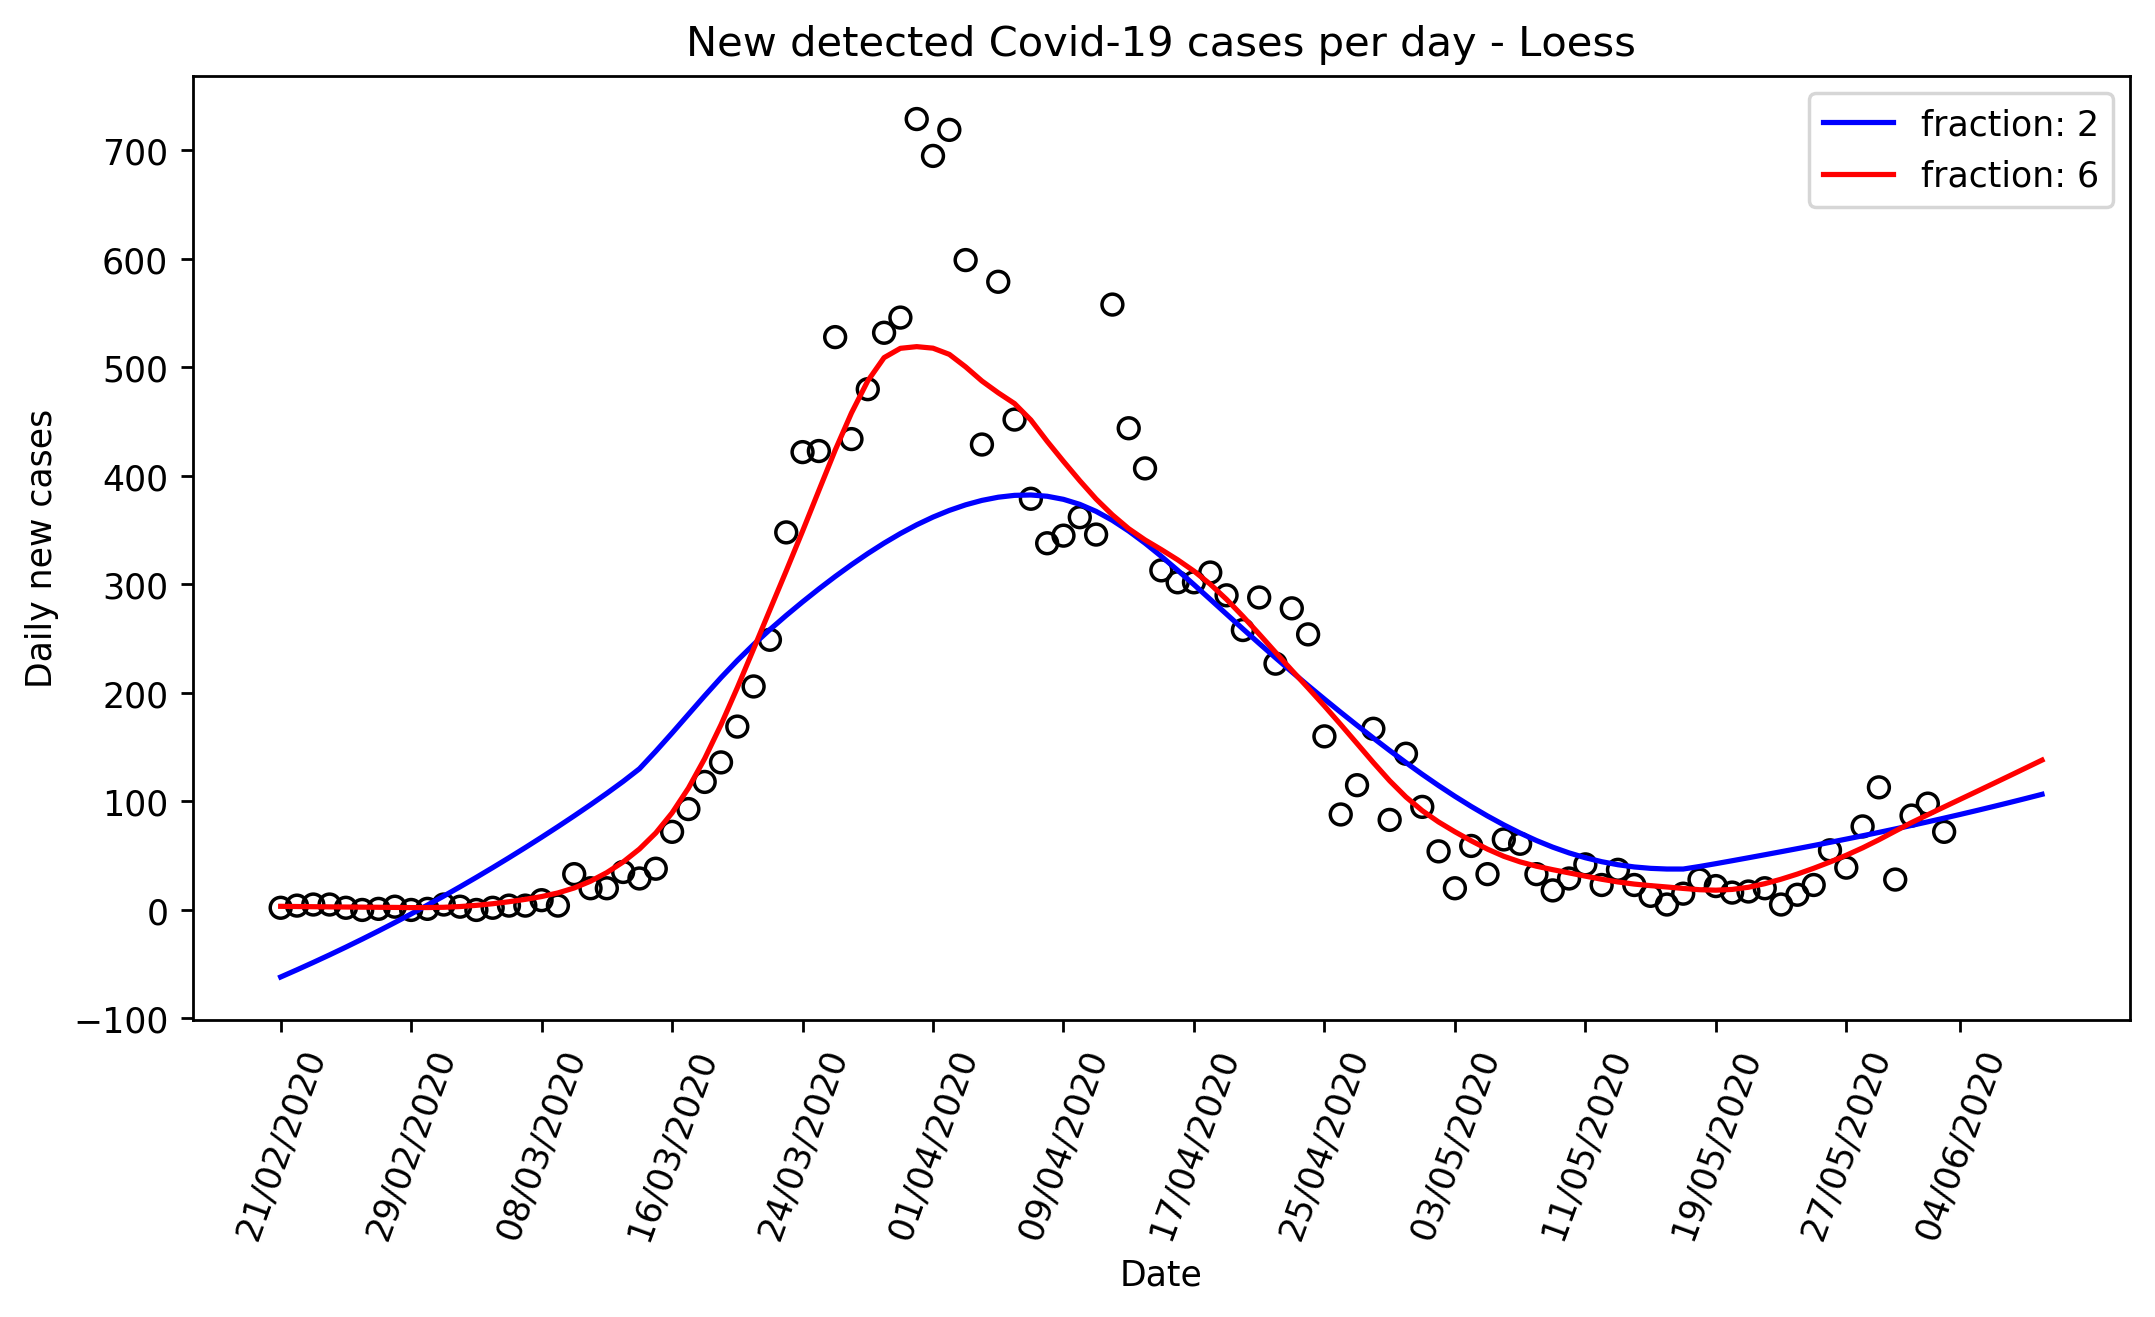

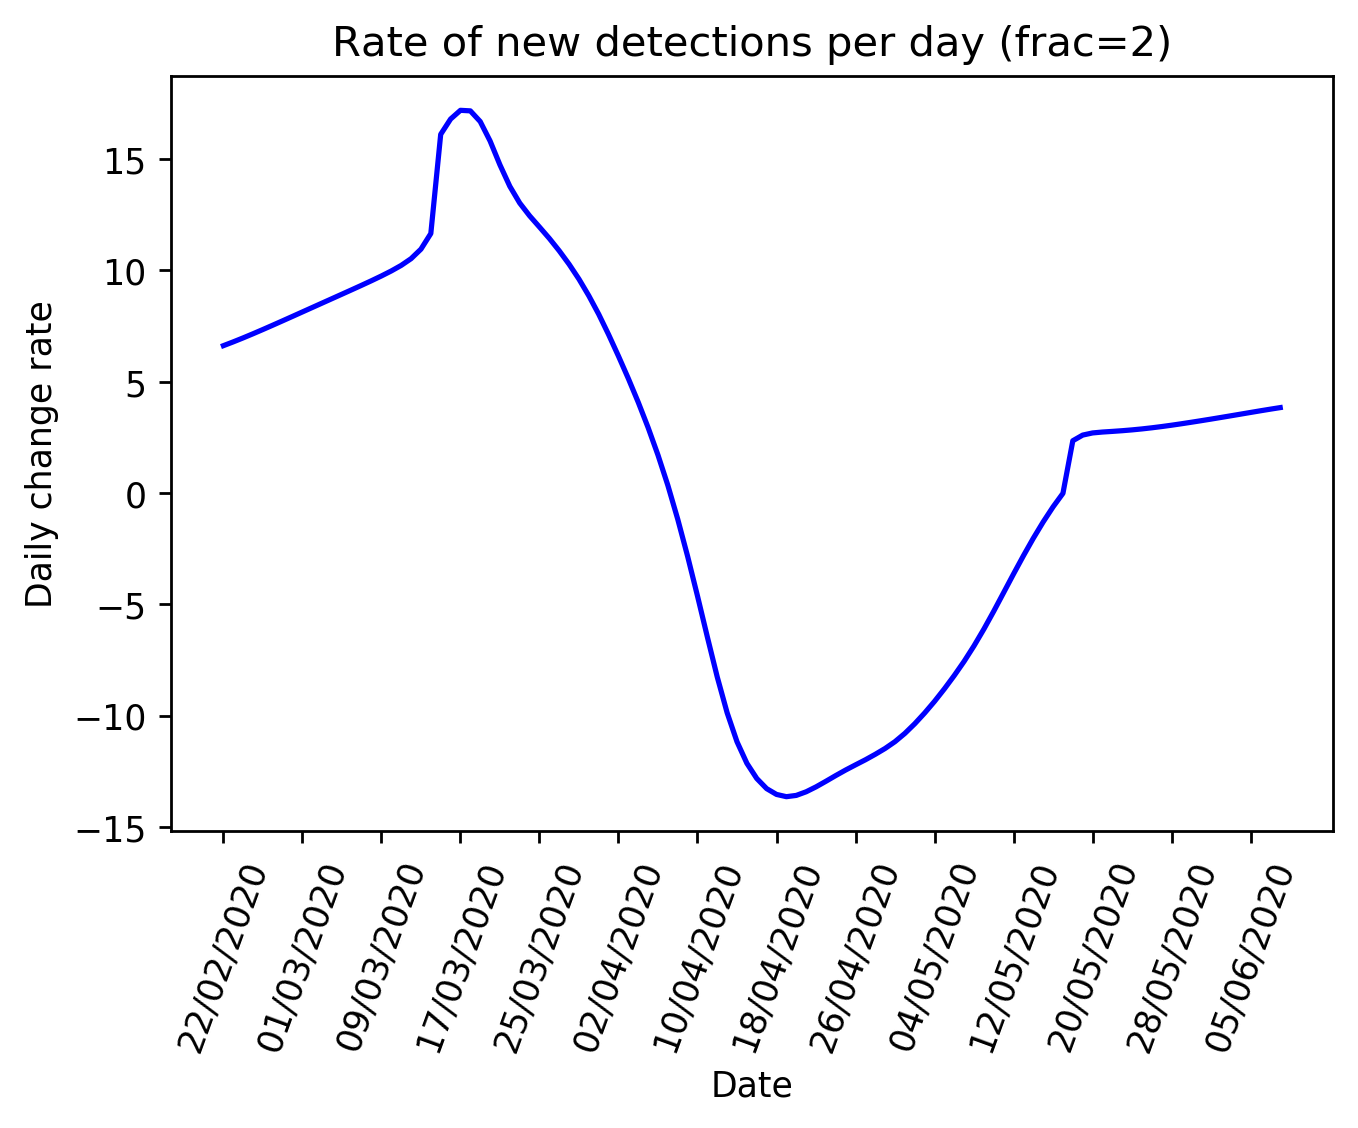

<Figure size 2500x1250 with 0 Axes>

In [13]:
url = 'https://raw.githubusercontent.com/idandrd/israel-covid19-data/master/IsraelCOVID19.csv'
df = pd.read_csv(url, error_bad_lines=False)
df=df[['Date','New Cases']]
df = df[df['New Cases'].notna()]
dic = {'103':['03/06/2020',92],'104':['04/06/2020',118],'105':['05/06/2020',120],'106':['06/06/2020',136]
       ,'107':['07/06/2020',111],'108':['08/06/2020',148]}
df2 = pd.DataFrame.from_dict(dic,orient='index')
df2.columns = ['Date','New Cases']
df=pd.concat([df, df2])
x = df.Date
y = df['New Cases']
lowess_sm = sm.nonparametric.lowess
yest_sm = lowess_sm(y,x.index,frac=1./109.,it=3, return_sorted = False)
yest_sm2 = lowess_sm(y,x.index,frac=1./2.35,it=1, return_sorted = False)
yest_sm3 = lowess_sm(y,x.index,frac=1./6.,it=1, return_sorted = False)
fig = plt.figure(dpi=250,figsize=(10,5))
plt.scatter(x[0:103], y[0:103],  edgecolor = 'black',facecolors = 'none',)
plt.xticks(x[::8], rotation=70)
plt.plot(x.index,yest_sm2,color = 'blue', label = 'fraction: 2')
plt.plot(x.index,yest_sm3,color = 'red', label = 'fraction: 6')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Daily new cases')
plt.title('New detected Covid-19 cases per day - Loess')
plt.show()
z=lowess_sm(yest_sm2 ,df.index)
p=np.diff(yest_sm2)/np.diff(z[0:109,0])

#fig2
fig = plt.figure(dpi=250)
plt.plot(z[1:109,0],p,color = 'blue')
plt.xlabel('Date')
plt.ylabel('Daily change rate')
plt.title('Rate of new detections per day (frac=2)')
plt.xticks(z[1::8,0], x[1::8] , rotation=70)
fig = plt.figure(dpi=250,figsize=(10,5))


In [ ]:
# Import libs
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
sns.set()
#SkLearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.model_selection import cross_val_score
from itertools import product
from sklearn.metrics import mean_squared_error
from scipy.stats import skew
import random
import scipy
from scipy import stats
from scipy.stats import uniform


# Q 3  fMRI Data

In [8]:
feature_train = pd.read_csv('MyData0.csv')
feature_train.shape
train_resp = pd.read_csv('MyData1.csv')
train_resp.shape

(1750, 15)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(feature_train, train_resp, test_size=0.3)

In [10]:
targets = y_train.keys()

We will run the ElasticNet algorithm with cross validation technique.

The parameter l1_ratio corresponds to alpha in the glmnet R package while alpha corresponds to the lambda parameter in glmnet.

L1_ratio : 
The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.


Please note that the CV takes about 5 hours to run, so i saved the results in order not to run it again. 

In [12]:
# def model_cv(model,target):
#     rmse= np.sqrt(-cross_val_score(model, X_train, y_train[target], scoring="neg_mean_squared_error", cv = 5))
#     return(rmse)

# results = []
# alphas = [0.0005, 0.001, 0.01, 0.03, 0.05, 0.1,0.2]
# l1_ratios = [1.5, 1.1, 1, 0.9, 0.8, 0.7, 0.5,0.6]
# for target in targets:
#     cv_elastic = [model_cv(ElasticNet(alpha = alpha, l1_ratio=l1_ratio),target).mean() for (alpha, l1_ratio) in product(alphas, l1_ratios)]
#     results.append(cv_elastic)

In [ ]:
# results
idx = list(product(alphas, l1_ratios))
dt_cv_elastic =pd.DataFrame(results,index=y_train.keys())
dt_cv_elastic = dt_cv_elastic.T
dt_cv_elastic['Alpha_L1_Ratio'] = idx
dt_cv_elastic.head()
# dt_cv_elastic.to_csv('RMSE_RESULTS.csv')

In [13]:
dt_cv_elastic = pd.read_csv('RMSE_RESULTS.csv',index_col=[0])

In [14]:
dt_cv_elastic.set_index('Alpha_L1_Ratio',inplace = True)

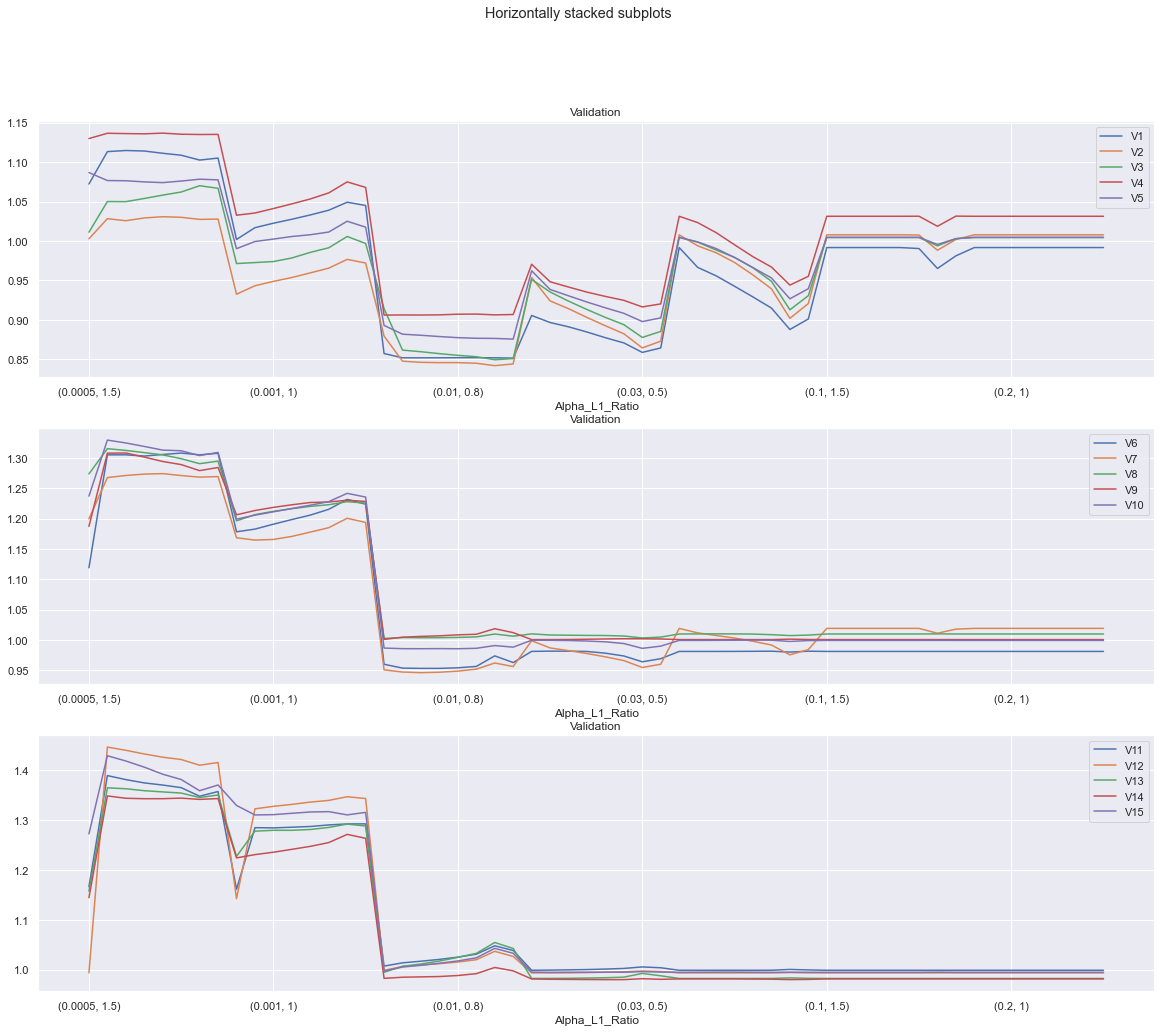

In [15]:
fig, (ax1, ax2,ax3) = plt.subplots(3)
fig.suptitle('Horizontally stacked subplots')
dt_cv_elastic.iloc[:,:5].plot(title = "Validation",figsize =(20,16),ax= ax1)
dt_cv_elastic.iloc[:,5:10].plot(title = "Validation",figsize =(20,16),ax = ax2)
dt_cv_elastic.iloc[:,10:15].plot(title = "Validation",figsize =(20,16),ax = ax3)
plt.show()

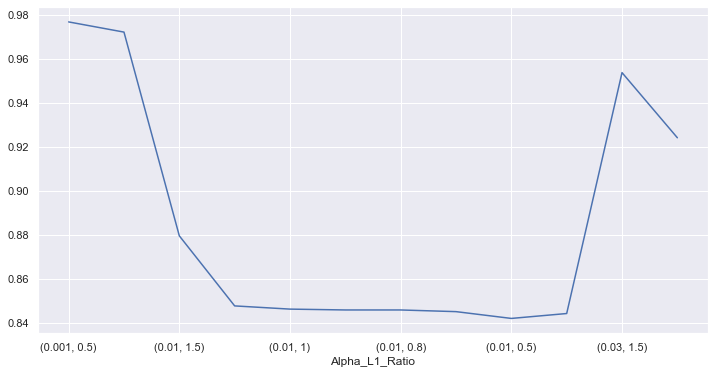

In [16]:
plt.figure(figsize=(12,6))
dt_cv_elastic['V2'][14:26].plot()

In [17]:
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5,normalize=False)
elastic.fit(X_train,  y_train['V2'])

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


RMSE: 0.8028


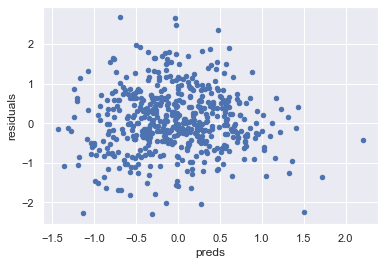

In [18]:
preds = pd.DataFrame({"preds":elastic.predict(X_test), "true":y_test['V2']})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

rmse = np.sqrt(np.mean((preds['true']-preds['preds'])**2))
print ('RMSE: {0:.4f}'.format(rmse))

## Analysis

The goal of the analysis now is to determine how the selected features from the ElasticNet model can explain the response.

As we can see, the model works best with the second Voxel. 

So First lets examine the the most important features of the model.




### Important features

In [19]:
# The coefficients of the model

coef = pd.Series(elastic.coef_, index = X_train.columns)
# Get the 'Best' 10 coefs 
coef = np.abs(coef)

imp_coef = pd.concat([coef.sort_values(ascending = False).head(10)])

print("ElasticNet Model  picked " + str(sum(coef != 0)) + " features and removed the other " +  str(sum(coef == 0)) + " features")

ElasticNet Model  picked 260 features and removed the other 10661 features


Text(0.5, 1.0, 'Coefficients in the ElasticNet Model')

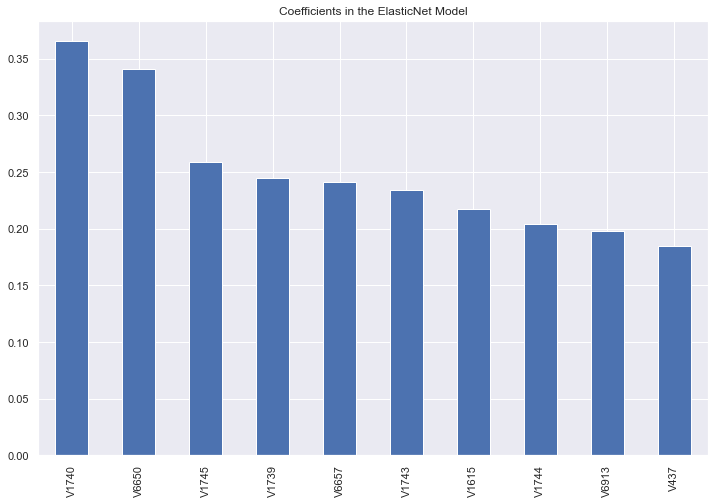

In [20]:
plt.figure(figsize= (12,8))
imp_coef.plot(kind = "bar")
plt.title("Coefficients in the ElasticNet Model")

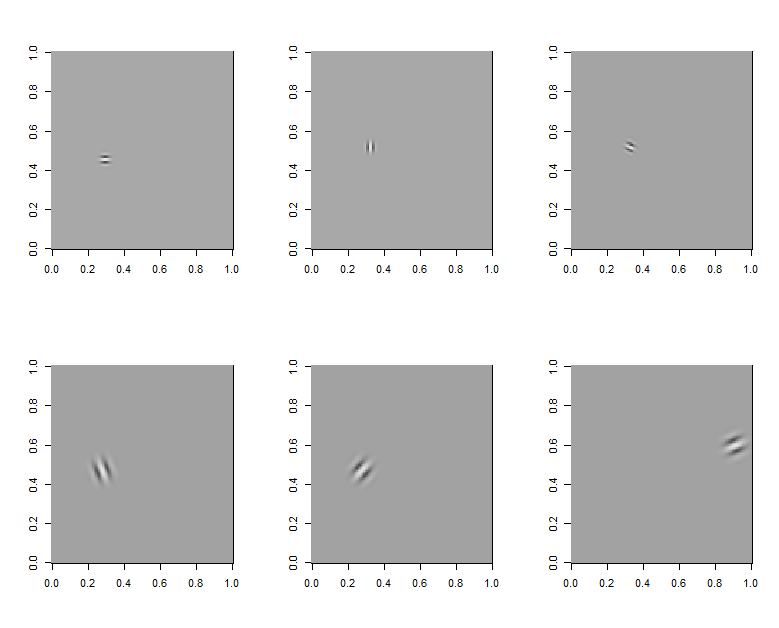

In [21]:
# Please note that i used R in order to show the images 
from IPython.display import Image
Image(filename='feature_imp_1.png') 

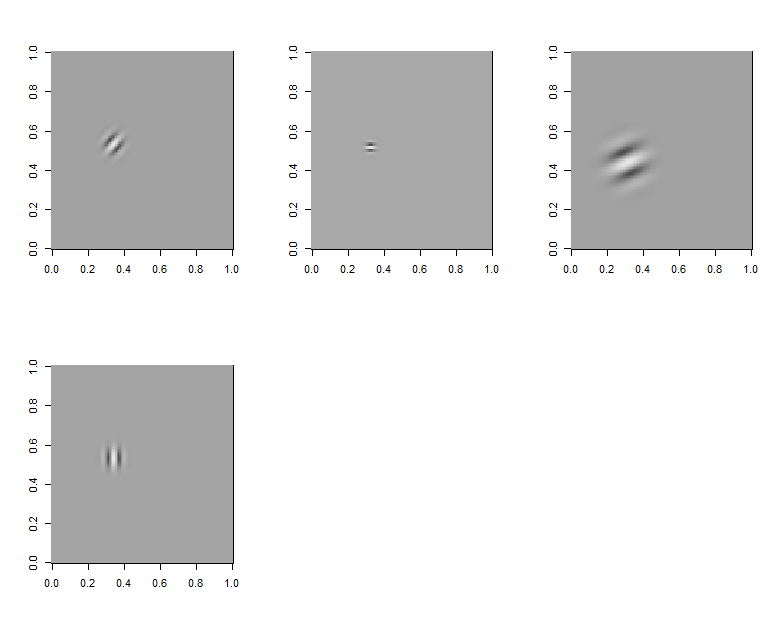

In [22]:
from IPython.display import Image
Image(filename='feature_imp_2.png') 

We can see that these  features have the same location in the image: middle left - except one actually.
They somehow differ in their size, but also the first row are the same size ( The biggest coefs )

In [23]:
corr = X_train.apply(lambda x: x.corr(y_train['V2'])).sort_values()
corr.sort_values(ascending=False)[0:10]

V1740    0.395575
V1744    0.373062
V6900    0.369400
V6657    0.363205
V6912    0.362086
V1741    0.356093
V6899    0.355192
V7168    0.353040
V6904    0.352565
V6908    0.351959
dtype: float64

### Linearity check

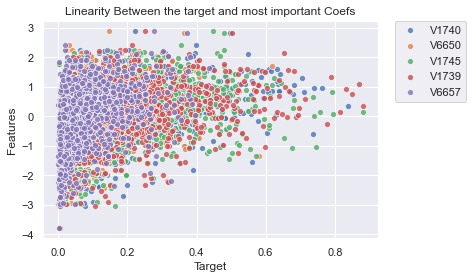

In [24]:
for i in imp_coef.index[0:5]:
#     plt.figure(figsize=(14,8))
    plt.title('Linearity Between the target and most important Coefs')
    plt.xlabel('Target')
    plt.ylabel('Features')    
    sns.scatterplot(x = X_train[i].values,y = y_train['V2'].values,label=i,alpha = 0.8)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In order to improve the linearity of the model, we try several transformations of the model as illustrated by the plots below:

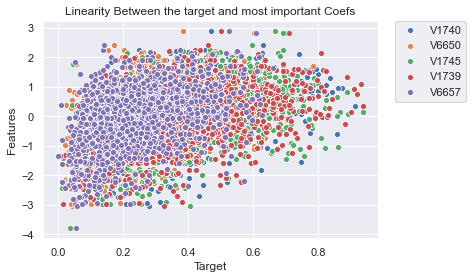

In [25]:
for i in imp_coef.index[0:5]:
#     plt.figure(figsize=(14,8))
    plt.title('Linearity Between the target and most important Coefs')
    plt.xlabel('Target')
    plt.ylabel('Features')    
    sns.scatterplot(x = np.sqrt(X_train[i].values),y = y_train['V2'].values,label=i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

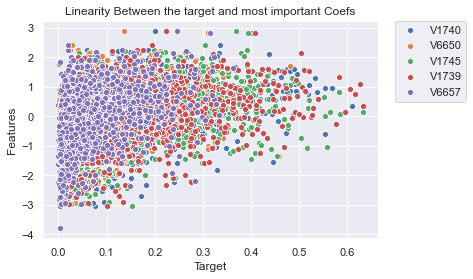

In [26]:
for i in imp_coef.index[0:5]:
#     plt.figure(figsize=(14,8))
    plt.title('Linearity Between the target and most important Coefs')
    plt.xlabel('Target')
    plt.ylabel('Features')    
    sns.scatterplot(x = np.log1p(X_train[i].values),y = y_train['V2'].values,label=i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [152]:
from sklearn.feature_selection import VarianceThreshold
def getManipulatedData(df,features):
    
    #First remove columns with little variance 
    sel = VarianceThreshold(threshold=0.001)# Create a VarianceThreshold feature selector
    sel.fit(df / df.mean()) #Fit the selector 
    mask = sel.get_support()# Create Mask
    output = df.loc[:, mask] # Apply Mask
#     print("Dimensionality reduced from {} to {}.".format(df.shape[1], output.shape[1]))
    
    # Apply sqrt transformation to the most significant features
    
    output[features.index] = np.sqrt(output[features.index])
    return output

In [28]:
train_data = getManipulatedData(X_train,imp_coef)

test_data = getManipulatedData(X_test,imp_coef)

Dimensionality reduced from 10921 to 10409.
Dimensionality reduced from 10921 to 10409.


In [73]:
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5,normalize=False)
elastic.fit(train_data,y_train['V2'])

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


RMSE: 0.7991


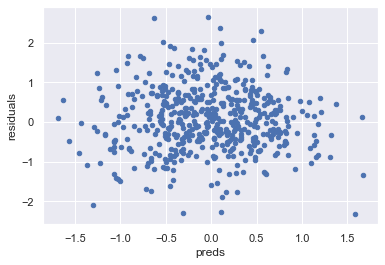

In [74]:
preds = pd.DataFrame({"preds":elastic.predict(test_data), "true":y_test['V2']})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")



# Residuals plot 
rmse = np.sqrt(np.mean((preds['true']-preds['preds'])**2))
print ('RMSE: {0:.4f}'.format(rmse))


#We can see that the resuduals distributed pretty well, although their variance is somewhat large. 

I chose to run and fir a nonlinear model to predict the values. 
The purpose of this is to check and compare between how many features the models will choose and their RMSE error. 

In [31]:
# Fit the random forest model to the training data
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train['V2'])

preds = pd.DataFrame({"preds":rf.predict(X_test), "true":y_test['V2']})
rmse = np.sqrt(np.mean((preds['true']-preds['preds'])**2))
print ('RMSE: {0:.4f}'.format(rmse))

RMSE: 0.7637


In [32]:
# Print the importances per feature
d = dict(zip(X_train.columns, rf.feature_importances_.round(2)))
feat = pd.DataFrame.from_dict(d,orient='index',columns=['Value'])

len(feat[feat.Value > 0])

14

We see that the RMSE error actaully smaller, and the model pick significantly lower number of variables. 

### Predicting on Validation Set

In [145]:
validation = pd.read_csv('MyData2.csv')

In [110]:
# Train the model with the final manipulations to the 15 different voxels

elastic = ElasticNet(alpha=0.01, l1_ratio=0.5,normalize=False)
Voxels = y_train.keys()
models = []
m = [elastic.fit(train_data,y_train[voxel]) for voxel in Voxels]

In [153]:
def gettrainedModel(X_train,y_train,X_test,y_test,voxel,valid_data):
    elastic = ElasticNet(alpha=0.01,l1_ratio=0.5)
    elastic.fit(X_train,y_train[voxel])
    coef = pd.Series(elastic.coef_, index = X_train.columns)
    coef = np.abs(coef)

    imp_coef = pd.concat([coef.sort_values(ascending = False).head(10)])
    
    train_data = getManipulatedData(X_train,imp_coef)

    valid_data_transformed = getManipulatedData(valid_data,imp_coef)
    
    elastic = ElasticNet(alpha=0.01,l1_ratio=0.5)
    elastic.fit(train_data,y_train[voxel])    
    real_pred = elastic.predict(valid_data_transformed)
    
    return real_pred    

In [156]:
results = []
for voxel in Voxels:
    results.append(gettrainedModel(X_train,y_train,X_test,y_test,voxel,validation))

In [168]:
preds = pd.DataFrame(np.asarray(results).T,columns=y_train.keys())

# preds.to_csv('preds.csv')

In [173]:
def getScores(X_train,y_train,X_test,y_test,voxel):
    elastic = ElasticNet(alpha=0.01,l1_ratio=0.5)
    elastic.fit(X_train,y_train[voxel])
    coef = pd.Series(elastic.coef_, index = X_train.columns)
    coef = np.abs(coef)

    imp_coef = pd.concat([coef.sort_values(ascending = False).head(10)])
    
    train_data = getManipulatedData(X_train,imp_coef)

    test_data = getManipulatedData(X_test,imp_coef)
    
    elastic = ElasticNet(alpha=0.01,l1_ratio=0.5)
    elastic.fit(train_data,y_train[voxel])
    
    preds = pd.DataFrame({"preds":elastic.predict(test_data), "true":y_test[voxel]})
    rmse = np.sqrt(np.mean((preds['true']-preds['preds'])**2))
    
    return rmse    

In [175]:
mses = []
for voxel in Voxels:
    mses.append(getScores(X_train,y_train,X_test,y_test,voxel))

mses

[0.8242592691933909,
 0.7990675970481462,
 0.8666314203082629,
 0.8876397167050206,
 0.8804771207947901,
 0.903667173025032,
 0.915237595970044,
 0.985744129362484,
 1.0089446364629213,
 0.952925392695937,
 1.0191448913335635,
 1.0449890635756656,
 1.0297754234281329,
 1.0136077471820193,
 1.0450864461130949]

In [178]:
mses = pd.DataFrame(mses,columns=['RMSE'])


mses.to_csv('rmses.csv')